In [31]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/tarekmourad/Desktop/GunViolenceData/fio-records-2022-mark43-fieldcontact-table.csv")
display(df)

,fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
0,FC22000008,2022-01-01 00:00:00,151206,"WATTY-NILES, CREFTON",11586,CHRISTOPHER CARROLL,ALBANY ST,BOSTON,MA,2118,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2022 11:40 PM\n\nOfficers responded to a...,NaN
1,FC22000001,2022-01-01 02:30:00,153132,"VILLEGAS-HOAG, STEPHANIE",11212,MICHAEL MCCARTHY,NaN,BOSTON,MA,2122,...,Probable Cause,2008.0,MA,Taurus,Brown,"4 Door, Sedan",Passenger Car/ Automobile,NaN,"About 02:30am, Officers assisted State Police ...",NaN
2,FC22000004,2022-01-01 09:29:00,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:00AM, Saturday 1/1/21 Officers respon...",NaN
3,FC22000003,2022-01-01 10:16:00,162319,"Uhrig, Robert",9266,STEVEN CICCOLO,E EIGHTH ST,SOUTH BOSTON,MA,2127,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:16am on Saturday, 01/01/22, Officers ...",NaN
4,FC22000005,2022-01-01 10:29:00,100417,"FLYNN, THOMAS",11212,MICHAEL MCCARTHY,ROBINSON ST,DORCHESTER,MA,2122,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to a radio call for a B&E t...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,FC22005691,2022-12-31 14:18:00,144446,"BANG, SEAN",51201,TIMOTHY COUGHLIN,MAVERICK STREET,BOSTON,MA,2128,...,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel
5274,FC22005694,2022-12-31 15:00:00,153329,"KOVALESKI, STEVEN",10652,DONALD KEENAN,MASSACHUSETTS AVE,DORCHESTER,MA,2125,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reasonable Suspicion
5275,FC22005697,2022-12-31 18:01:00,164603,"MacLeod, Sean",102682,ERIC MERNER,DORCHESTER AVE,DORCHESTER,MA,2124,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5276,FC23000049,2022-12-31 22:45:00,162308,"Tilley, Ryan",11478,JOHN BROWN,BRAGDON ST,ROXBURY,MA,2119,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,street,city,zip,count
1289,nan,BOSTON,2118,226
1294,nan,BOSTON,2124,149
1290,nan,BOSTON,2119,135
1292,nan,BOSTON,2121,133
1317,nan,DORCHESTER,2124,132
...,...,...,...,...
568,HENDRY ST,BOSTON,2122,1
569,HIGH ST,DEDHAM,2026,1
571,HIGHLAND ST,ROXBURY,2119,1
572,HIGHLAND STREET,BOSTON,2119,1


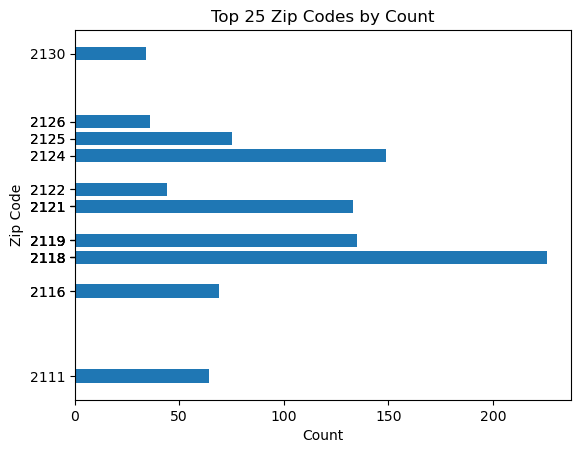

In [39]:
import numpy as np

# convert the "street" and "city" columns to string
df['street'] = df['street'].astype(str)
df['city'] = df['city'].astype(str)
# group by street, city, and zip, and aggregate by count
grouped_df = df.groupby(['street', 'city', 'zip']).agg({'zip': 'count'})


# rename the column to "count"
grouped_df.rename(columns={'zip': 'count'}, inplace=True)

# reset the index to make the grouped columns regular columns
grouped_df.reset_index(inplace=True)

# sort the grouped_df by count in descending order
grouped_df = grouped_df.sort_values(by='count', ascending=False)

display(grouped_df)

# get the top 25 zip codes by count
top_25_zipcodes = grouped_df.sort_values(by='count', ascending=False).head(25)

# filter out empty zip codes
top_25_zipcodes = top_25_zipcodes[top_25_zipcodes['zip'].notnull()]

# create a horizontal bar chart
plt.barh(top_25_zipcodes['zip'], top_25_zipcodes['count'])

# set the x-axis label
plt.xlabel('Count')

# set the y-axis label
plt.ylabel('Zip Code')

# set the title
plt.title('Top 25 Zip Codes by Count')

# set y-ticks to exact zip codes
plt.yticks(top_25_zipcodes['zip'])

# show the plot
plt.show()




